In [140]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


# Logistic Regression

In [126]:
num = 10000
np.random.seed(0)
X = np.random.normal(0, 1, (num,))
true_prob = 1 / (1 + np.exp(2 * X + 0.5))
Y_random = np.random.binomial(1, true_prob)
model = LogisticRegression()
X_shaped = X.reshape(-1, 1)
model.fit(X_shaped, Y_random)
Y_pred = model.predict_proba(X_shaped)[:,1]
log_loss(Y_random, Y_pred)

0.46102107129920566

In [127]:
print(model.coef_)
print(model.intercept_)

[[-1.98777471]]
[-0.46217235]


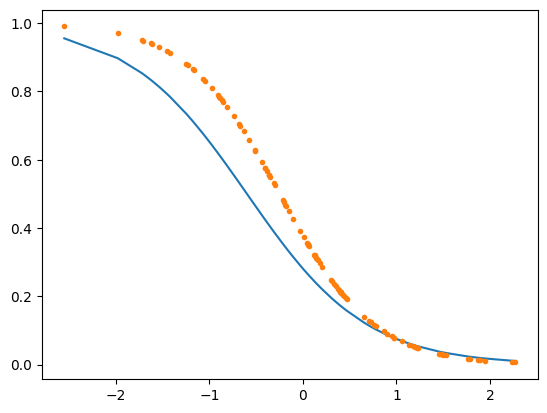

In [108]:
sorted_idx = np.argsort(X)
X_sorted = X[sorted_idx]
Y_pred_sorted = Y_pred[sorted_idx]
true_prob_sorted = true_prob[sorted_idx]
plt.plot(X_sorted, Y_pred_sorted)
plt.plot(X_sorted, true_prob_sorted, ".")

In [111]:
num = 100
np.random.seed(0)
X = np.random.normal(0, 1, (num,))
true_prob = 1 / (1 + np.exp(2 * X + 0.5))
Y_random = np.random.binomial(1, true_prob)
model = LogisticRegression()
X_shaped = X.reshape(-1, 1)
model.fit(X_shaped, Y_random)
Y_pred = model.predict_proba(X_shaped)[:,1]
log_loss(Y_random, Y_pred)

num = 100000
np.random.seed(0)
X1 = np.random.normal(0, 1, (num,))
X2 = np.random.normal(0, 1, (num,))
X = np.vstack((X1, X2)).T
true_prob = 1 / (1 + np.exp(2 * X1 - X2 + 0.5))
Y_random = np.random.binomial(1, true_prob)
model = LogisticRegression()
model.fit(X, Y_random)
Y_pred = model.predict_proba(X)[:,1]
log_loss(Y_true, Y_pred)

0.42857371408692646

In [112]:
print(model.coef_)
print(model.intercept_)

[[-2.0058711  0.9960015]]
[-0.5159457]


# Feature scaling

In [135]:
num = 1000
cols = 1000
np.random.seed(0)
X = np.random.normal(0, 1, (num, cols))
coefs = np.random.normal(0, 1, (cols,))**4
Y = np.random.binomial(1, 1 / (1 + np.exp(X @ coefs / np.std(X @ coefs))))

In [136]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

model = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = 0.1)
model.fit(X_train, Y_train)
Y_pred = model.predict_proba(X_test)
log_loss(Y_test, Y_pred)

0.6475315503198419

In [137]:
model2 = LogisticRegression()
model2.fit(X_train, Y_train)
Y_pred = model2.predict_proba(X_test)
log_loss(Y_test, Y_pred)

1.748520482797653

In [143]:
X_first_mult = X * np.hstack((10 * np.ones(500), np.ones(500)))
X_train, X_test, Y_train, Y_test = train_test_split(X_first_mult, Y, test_size=0.3)

model = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = 0.1)
model.fit(X_train, Y_train)
Y_pred = model.predict_proba(X_test)
log_loss(Y_test, Y_pred)

1.8845919961639879

In [145]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_first_mult)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3)

model = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = 0.1)
model.fit(X_train, Y_train)
Y_pred = model.predict_proba(X_test)
log_loss(Y_test, Y_pred)

0.7014263091675107

# Support Vector Machines

In [129]:
num = 10000
X1 = np.random.normal(0, 1, (num,))
X2 = np.random.normal(0, 1, (num,))
Y = X1 * X2 + np.random.normal(0, 0.1, (num,)) > 0
X = np.vstack((X1, X2)).T

In [130]:
svc = SVC(kernel = 'poly', degree = 2)
svc.fit(X, Y)
(svc.predict(X) == Y).sum()

9100

In [131]:
svc2 = SVC(kernel = 'linear')
svc2.fit(X, Y)
(svc2.predict(X) == Y).sum()

5032

In [133]:
param_grid = {
    'C': [0.1, 1, 10],
    'degree': [2, 3, 4]
}

grid = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X, Y)

# Best parameters
print("Best params", grid.best_params_)
# Best accuracy
print("Best CV accuracy", grid.best_score_)

best_model = grid.best_estimator_
train_accuracy = accuracy_score(Y, best_model.predict(X))
print("Train accuracy", train_accuracy)

Best params {'C': 10, 'degree': 2}
Best CV accuracy 0.9107000000000001
Train accuracy 0.9098
